## This Notebook contains:
- Reading the datset from Northeastern university
- Modelling for classification models
- Calculation of Error metrices
- Summarizing Models at the end


In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import pickle
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

Importing the dataset

In [175]:
dataset = pd.read_csv('../../Data/all_records_northeastern.csv')

Dropping the column, Unnamed as it is not necessary

In [176]:
dataset.drop(columns=['Unnamed: 0'],inplace=True)

In [177]:
dataset.head(3)

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,status
0,316,164,152,99.0,3.12,12,0,reject
1,316,164,152,99.0,3.12,12,0,reject
2,316,160,156,114.0,2.97,0,0,reject


Count of accept and reject in dataset

In [178]:
dataset.status.value_counts()

reject    1079
accept     574
Name: status, dtype: int64

As we see from above stats, our data is baised so we need to resample the data, in order to balance the dataset

In [179]:
balanced_data=resample(dataset[dataset.status=='accept'],replace=True,n_samples=1000,random_state=123)
balanced_data=balanced_data.append(dataset[dataset.status=='reject'])

In [180]:
balanced_data.status.value_counts()

reject    1079
accept    1000
Name: status, dtype: int64

In [181]:
encoded_dataset=balanced_data

Defining the label and target

In [182]:
X=encoded_dataset[['gre_score_quant','gre_score_verbal','test_score_toefl','undergraduation_score','work_ex','papers_published']].copy()
Y=encoded_dataset[['status']].copy()

Split the dataset into test and train data

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)

Training the model 

In [184]:
def modeltraining(model,X_train,X_test,Y_train,Y_test):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    
    X_test = sc.transform(X_test)
    print(X_test)
    model.fit(X_train,Y_train)
    predicted_labels_test=model.predict(X_test)
    predicted_labels_train=model.predict(X_train)
    accuracy_test=accuracy_score(Y_test,predicted_labels_test)
    accuracy_train=accuracy_score(Y_train,predicted_labels_train)
    
    
    return model,predicted_labels_test,predicted_labels_train,accuracy_test,accuracy_train,sc

Calling GradientBoostingClassifier

In [185]:

model=GradientBoostingClassifier()
model,predicted_labels_test,predicted_labels_train,accuracy_test,accuracy_train,sc=modeltraining(model,X_train,X_test,Y_train,Y_test)


[[-0.1189225   0.73491402  0.39076816 -0.36262002 -0.62058721  1.89123818]
 [ 0.78723151 -0.2849141   0.43531487  0.59052431  0.41333471  1.89123818]
 [ 0.10761601 -0.48887972  0.12348788 -0.03768445  0.2308779  -0.59699686]
 ...
 [ 1.24030852  1.5507765   0.70259515  0.87213514 -1.04631976 -0.59699686]
 [ 1.01377002  1.5507765  -4.37573011 -2.09560971  1.14316194 -0.59699686]
 [ 0.33415451  2.16267337  0.5244083  -0.01602208  0.83906726 -0.59699686]]


Accuracy of test data

In [186]:
print(accuracy_test)

0.7956730769230769


Accuracy of train data

In [187]:
print(accuracy_train)

0.8051713770294648


Confusion matrix:

In [188]:
print(confusion_matrix(Y_test,predicted_labels_test))

[[177  22]
 [ 63 154]]


Classification report:

In [189]:
print(classification_report(Y_test,predicted_labels_test))

              precision    recall  f1-score   support

      accept       0.74      0.89      0.81       199
      reject       0.88      0.71      0.78       217

   micro avg       0.80      0.80      0.80       416
   macro avg       0.81      0.80      0.80       416
weighted avg       0.81      0.80      0.79       416



In [190]:
print(classification_report(Y_train,predicted_labels_train))

              precision    recall  f1-score   support

      accept       0.75      0.90      0.82       801
      reject       0.89      0.72      0.79       862

   micro avg       0.81      0.81      0.81      1663
   macro avg       0.82      0.81      0.80      1663
weighted avg       0.82      0.81      0.80      1663



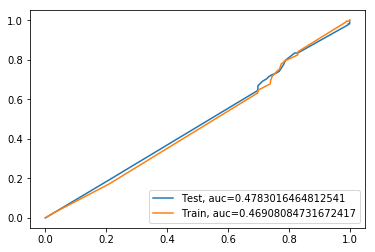

In [192]:
from sklearn import metrics
import matplotlib.pyplot as plt 
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba,pos_label='accept')
auc = metrics.roc_auc_score(Y_test,y_pred_proba,)
plt.plot(tpr,fpr,label="Test, auc="+str(auc))
plt.legend(loc=4)
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_train, y_pred_proba,pos_label='accept')
auc = metrics.roc_auc_score(Y_train, y_pred_proba)
plt.plot(tpr,fpr,label="Train, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Hypertuning the parameters using grid search, tune the learning rate, min_samples_split, min_samples_leaf,max_depth etc

In [156]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
 
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=2,min_samples_leaf=1,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

# run grid search
# grid_search = GridSearchCV(model, param_grid, cv=5,return_train_score=True)
model,predicted_labels_test,predicted_labels_train,accuracy_test,accuracy_train,sc=modeltraining(gsearch1,X_train,X_test,Y_train,Y_test)


C:\Users\lnuak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lnuak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\lnuak\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


[[-0.1189225   0.73491402  0.39076816 -0.36262002 -0.62058721  1.89123818]
 [ 0.78723151 -0.2849141   0.43531487  0.59052431  0.41333471  1.89123818]
 [ 0.10761601 -0.48887972  0.12348788 -0.03768445  0.2308779  -0.59699686]
 ...
 [ 1.24030852  1.5507765   0.70259515  0.87213514 -1.04631976 -0.59699686]
 [ 1.01377002  1.5507765  -4.37573011 -2.09560971  1.14316194 -0.59699686]
 [ 0.33415451  2.16267337  0.5244083  -0.01602208  0.83906726 -0.59699686]]


C:\Users\lnuak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model after the grid search

In [157]:
model

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Accuracy of test after grid search

In [160]:
accuracy_test

0.84375

Accuracy of train after grid search

In [162]:
accuracy_train

0.9993986770895971

In [125]:
gsearch1.best_score_

0.8953011290483509

In [148]:
gsearch1.best_params_

{'n_estimators': 80}

Saving the pickle file of model and scaler

In [ ]:
# Dump the trained decision tree classifier with Pickle
gb_classifier_pkl_filename = r'.\Manual Models\university_gradientboostingclassifier.pickel'
gb_standard_scaler_filename = r'.\Manual Models\UniversitystandardScaler_GBC_model.pickel'

gradient_boosting_classifier_model_pkl = open(gb_classifier_pkl_filename, 'wb')
pickle.dump(model,gradient_boosting_classifier_model_pkl)

gradient_boosting_classifier_model_pkl.close()

gb_standard_scaler_filename = open(gb_standard_scaler_filename, 'wb')
pickle.dump(sc, gb_standard_scaler_filename)

sc_rf_classifier_scaler_pkl.close()

random_forest_classifier_model_pkl = open(rf_classifier_pkl_filename, 'rb')
random_forest_classifier_model= pickle.load(random_forest_classifier_model_pkl)
random_forest_classifier_model_pkl.close()

sc_rf_classifier_scaler_pkl = open(standard_scaler_filename, 'rb')
standard_scaler_rf_classifier= pickle.load(sc_rf_classifier_scaler_pkl)
sc_rf_classifier_scaler_pkl.close()

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Test Accuracy</th> 
    <th>Train Accuracy</th>
    <th>Grid Search - Test Accuracy</th> 
    <th>Grid Search - Test Accuracy</th>
    <th>Test F1 Score</th> 
    <th>Train F1 Score</th>
    <th>Best Parameter</th>
    <th>Interpretability</th>
    <th>Reproducability</th>
</tr>
  <tr>
    <th>Gradient Boosting Classifier</th>
    <th>0.79</th>
    <th>0.80</th>
    <th>0.84</th>
    <th>0.99</th>
    <th>0.81</th>
    <th>0.82</th>
    <th>{'n_estimators': 80}</th>
    <th>Yes</th>
    <th>No</th>
</tr>

</table>